In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Nan, eliminar o no las filas si los ann son pequeño %
# ver la distribución de cada columna y graficos 
# estudiar paises origen / destino 
# buscar correlaciones entre aprobado/rechazado país origen/destino
# revisar notebook para ver más cosas que estudiar

In [2]:
asylum = asylum = pd.read_csv('Data/asylum_decisions.csv')

In [3]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
2,2016,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,164926,121182,158,5398,291664
3,2017,Syrian Arab Rep.,SYR,Germany,DEU,G,NaN,P,34201,55274,107,7309,96891
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332


In [4]:
print(asylum.shape)
print(asylum.info())

(101476, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101476 entries, 0 to 101475
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Year                      101476 non-null  int64 
 1   Country of origin         101476 non-null  object
 2   Country of origin (ISO)   101476 non-null  object
 3   Country of asylum         101476 non-null  object
 4   Country of asylum (ISO)   101476 non-null  object
 5   Authority                 101476 non-null  object
 6   Stage of procedure        99339 non-null   object
 7   Cases / Persons           101476 non-null  object
 8   Recognized decisions      101476 non-null  int64 
 9   Complementary protection  101476 non-null  int64 
 10  Rejected decisions        101476 non-null  int64 
 11  Otherwise closed          101476 non-null  int64 
 12  Total decisions           101476 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 10.1+ MB


In [5]:
# comprobamos distribución de valores por columna
print(asylum['Authority'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Stage of procedure'].value_counts(dropna=False)/len(asylum)*100)
print(asylum['Cases / Persons'].value_counts(dropna=False)/len(asylum)*100)

G    87.099413
U    12.263984
J     0.636604
Name: Authority, dtype: float64
FI     57.422445
AR     17.719461
FA      7.862943
RA      4.738066
IN      3.148528
EO      3.072648
JR      2.852891
NaN     2.105917
TA      0.427687
SP      0.298593
CA      0.174425
BL      0.093618
TP      0.081793
TR      0.000985
Name: Stage of procedure, dtype: float64
P    92.683984
C     7.316016
Name: Cases / Persons, dtype: float64


In [6]:
pd.DataFrame(asylum['Country of origin'].value_counts(dropna=False)/len(asylum)*100).head(10)


,Country of origin
Dem. Rep. of the Congo,2.142378
Iraq,2.131538
Afghanistan,2.081280
Somalia,2.068469
Iran (Islamic Rep. of),1.971895
Pakistan,1.917695
Syrian Arab Rep.,1.889117
Nigeria,1.879262
Sudan,1.838858
Ethiopia,1.673302


In [7]:
pd.DataFrame(asylum['Country of asylum'].value_counts(dropna=False)/len(asylum)*100).head(10)

,Country of asylum
United States of America,6.904096
Sweden,5.035673
Germany,5.021877
Canada,4.342899
United Kingdom of Great Britain and Northern Ireland,4.181284
France,4.079782
Netherlands (Kingdom of the),3.250030
Norway,3.184990
Belgium,3.149513
Australia,3.015491


<Axes: >

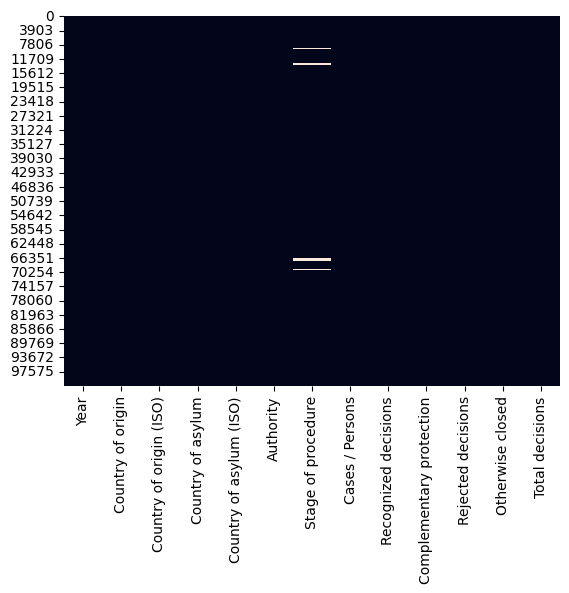

In [8]:
# heatmap para ver los Nan, como hemos visto antes solo hay una columna con nulos, que respresenan el 2,1% de los datos
sns.heatmap(asylum.isnull(), cbar=False)


In [9]:
# vamos a comparar la distribución de los datos en el DataFrame total con solo los datos donde hay Nan para ver si hay alguna diferencia 
asylum_nan = asylum[asylum['Stage of procedure'].isna()]

In [10]:
print(asylum_nan['Authority'].value_counts(dropna=False)/len(asylum_nan)*100)

print(asylum_nan['Cases / Persons'].value_counts(dropna=False)/len(asylum_nan)*100)

G    99.906411
U     0.093589
Name: Authority, dtype: float64
P    100.0
Name: Cases / Persons, dtype: float64


In [11]:
pd.DataFrame(asylum_nan['Country of origin'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of origin
Syrian Arab Rep.,1.029481
Iraq,1.029481
Guinea-Bissau,0.982686
Tunisia,0.982686
Benin,0.982686
Viet Nam,0.982686
Togo,0.982686
North Macedonia,0.982686
Myanmar,0.982686
Bosnia and Herzegovina,0.982686


In [12]:
pd.DataFrame(asylum_nan['Country of asylum'].value_counts(dropna=False)/len(asylum_nan)*100).head(10)

,Country of asylum
Germany,99.906411
United Arab Emirates,0.093589


In [73]:
# observamos que los nulos se concentran casi en un 100% en las solicitudes de asilo en Alemania, por lo que podemos eliminarlos sin miedo a perder información relevante o cambiar la distribución de los datos
asylum.dropna(inplace=True) 

### Exploratory Data Analysis

In [76]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


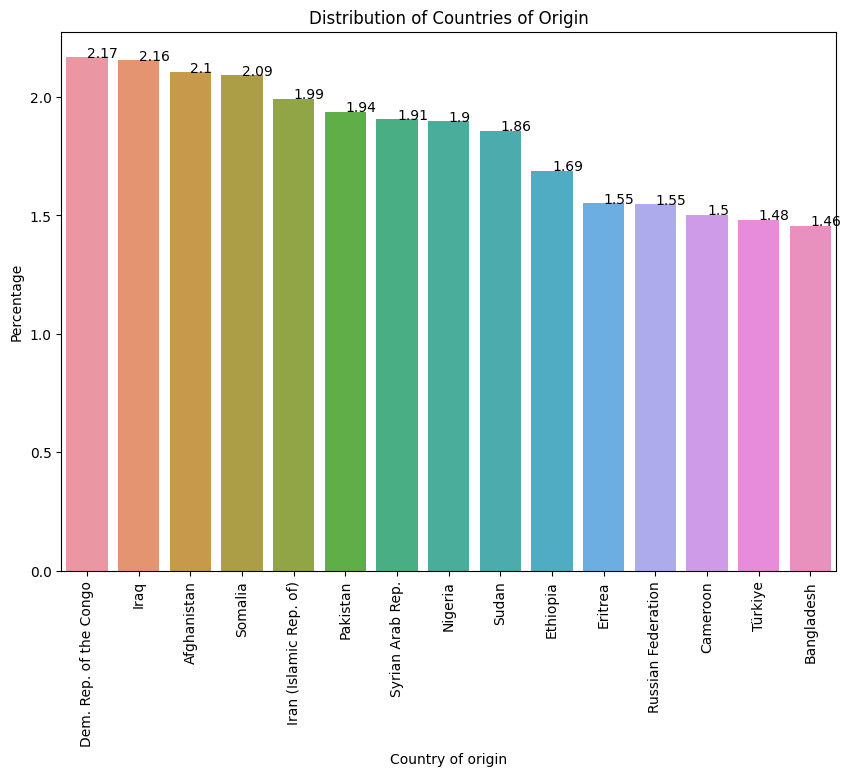

In [97]:
# vamos a empezar haciendo gráficos de barras para ver la distribución de los datos en las columnas que nos interesan
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of origin'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.xlabel('Country of origin')
plt.ylabel('Percentage')
plt.title('Distribution of Countries of Origin')
plt.show()





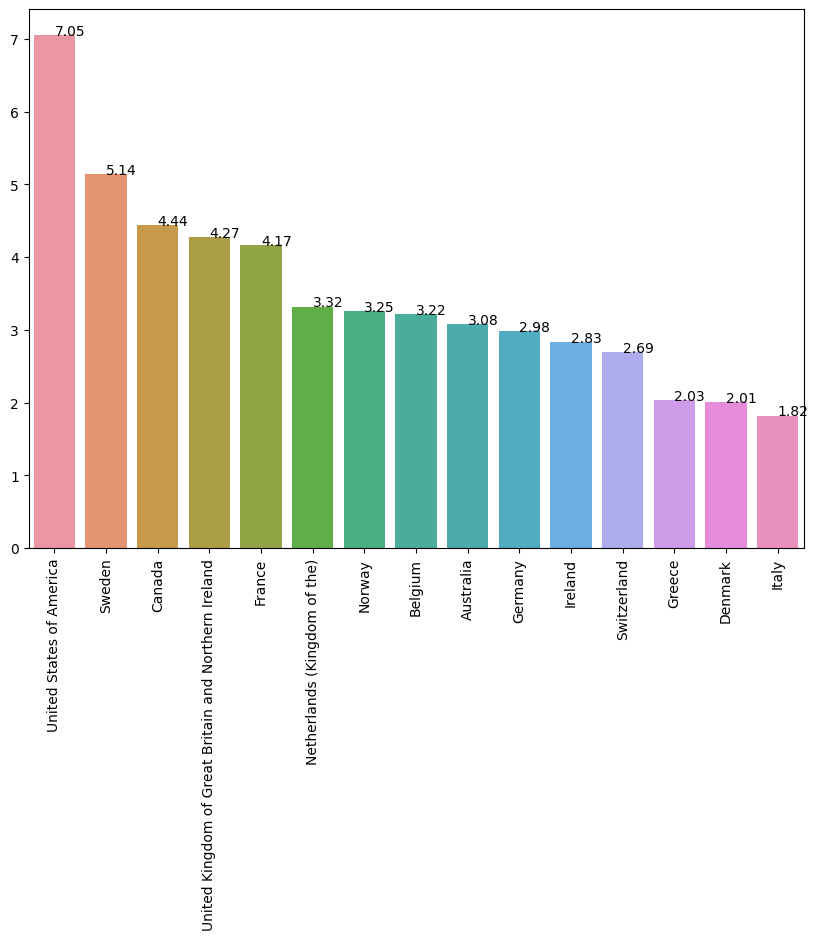

In [98]:
plt.figure(figsize=(10,7))
total_counts = len(asylum)
country_counts = asylum['Country of asylum'].value_counts().head(15)
country_percentages = (country_counts / total_counts) * 100
sns.barplot(x=country_percentages.index, y=country_percentages.values)
for index, value in enumerate(country_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Distribution of Countries of asylum')
plt.show()

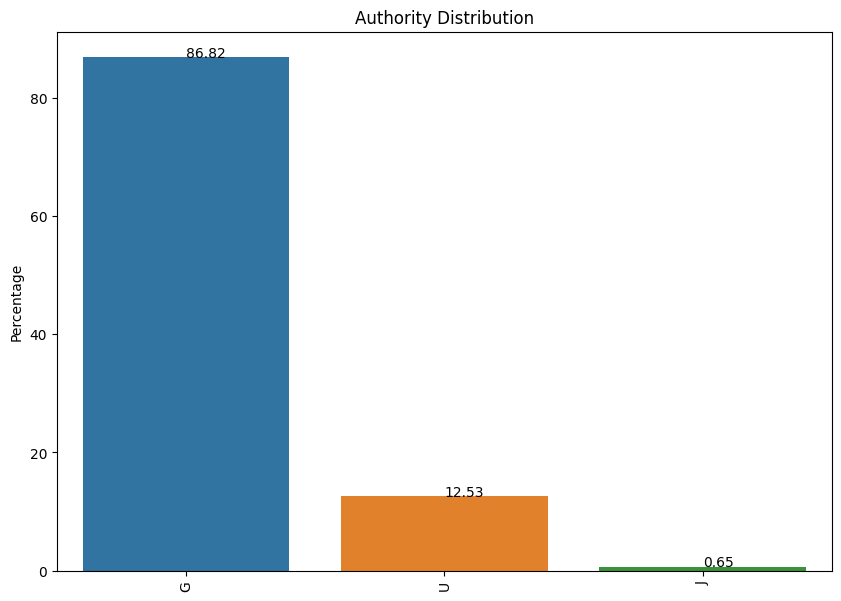

In [117]:
# veamos cómo se distribuyen las columnas Authority	
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Authority'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Authority Distribution')
plt.show()


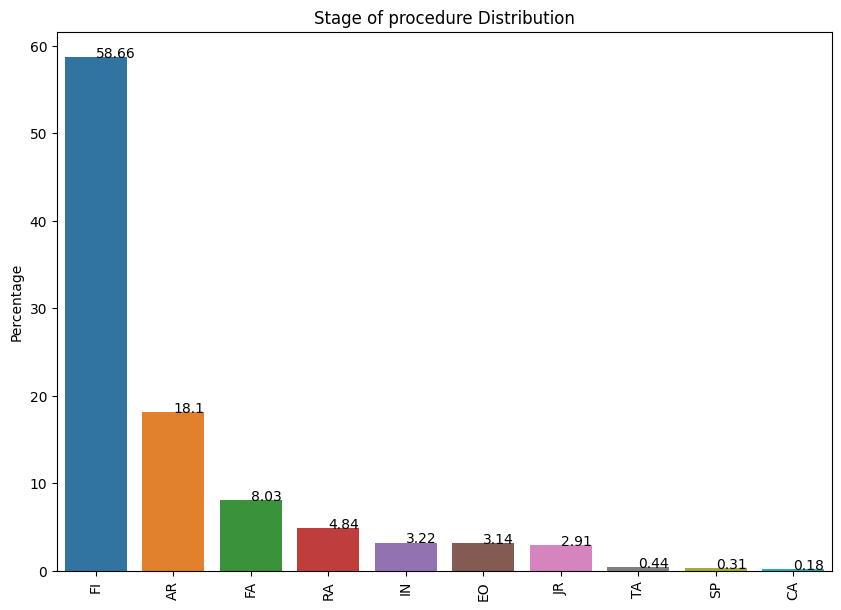

In [118]:
# lo mismo para Stage of procedure
plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Stage of procedure'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Stage of procedure Distribution')
plt.show()

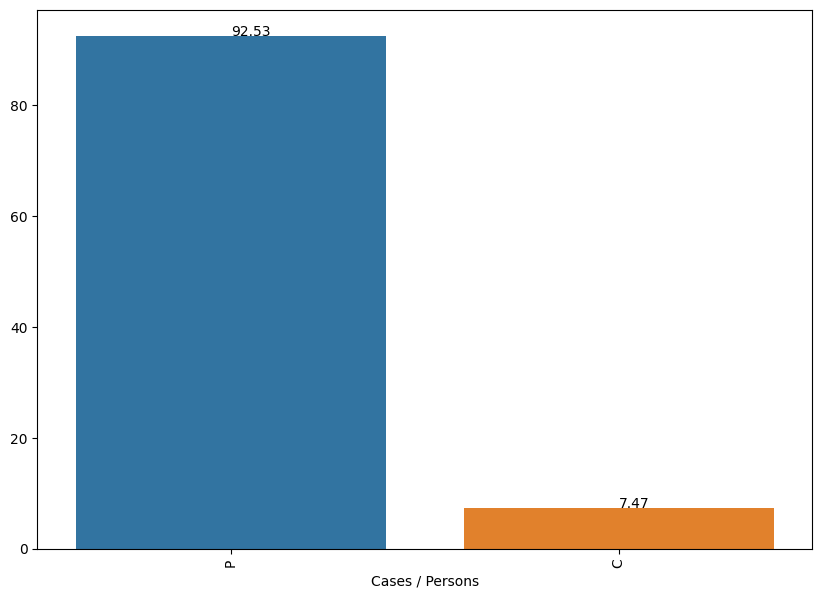

In [102]:
# Cases / Persons

plt.figure(figsize=(10,7))
total_counts = len(asylum)
authority_counts = asylum['Cases / Persons'].value_counts().head(10)
authority_percentages = (authority_counts / total_counts) * 100
sns.barplot(x=authority_percentages.index, y=authority_percentages.values)
plt.xlabel('Cases / Persons')
plt.xticks(rotation=90)
for index, value in enumerate(authority_percentages.values):
    plt.text(index, value, str(round(value,2)))
plt.show()

In [99]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [135]:
from_to_values = asylum.groupby(["Country of origin",'Country of asylum'])['Total decisions'].sum().reset_index().sort_values("Total decisions", ascending=False)
from_to_values

,Country of origin,Country of asylum,Total decisions
7368,Unknown,South Africa,970957
7163,Ukraine,Russian Federation,580275
2237,El Salvador,United States of America,420441
6559,Syrian Arab Rep.,Germany,360477
2859,Guatemala,United States of America,336693
...,...,...,...
1587,Congo,Rwanda,5
3043,Haiti,Trinidad and Tobago,5
6555,Syrian Arab Rep.,Fiji,5
4063,Libya,Russian Federation,5


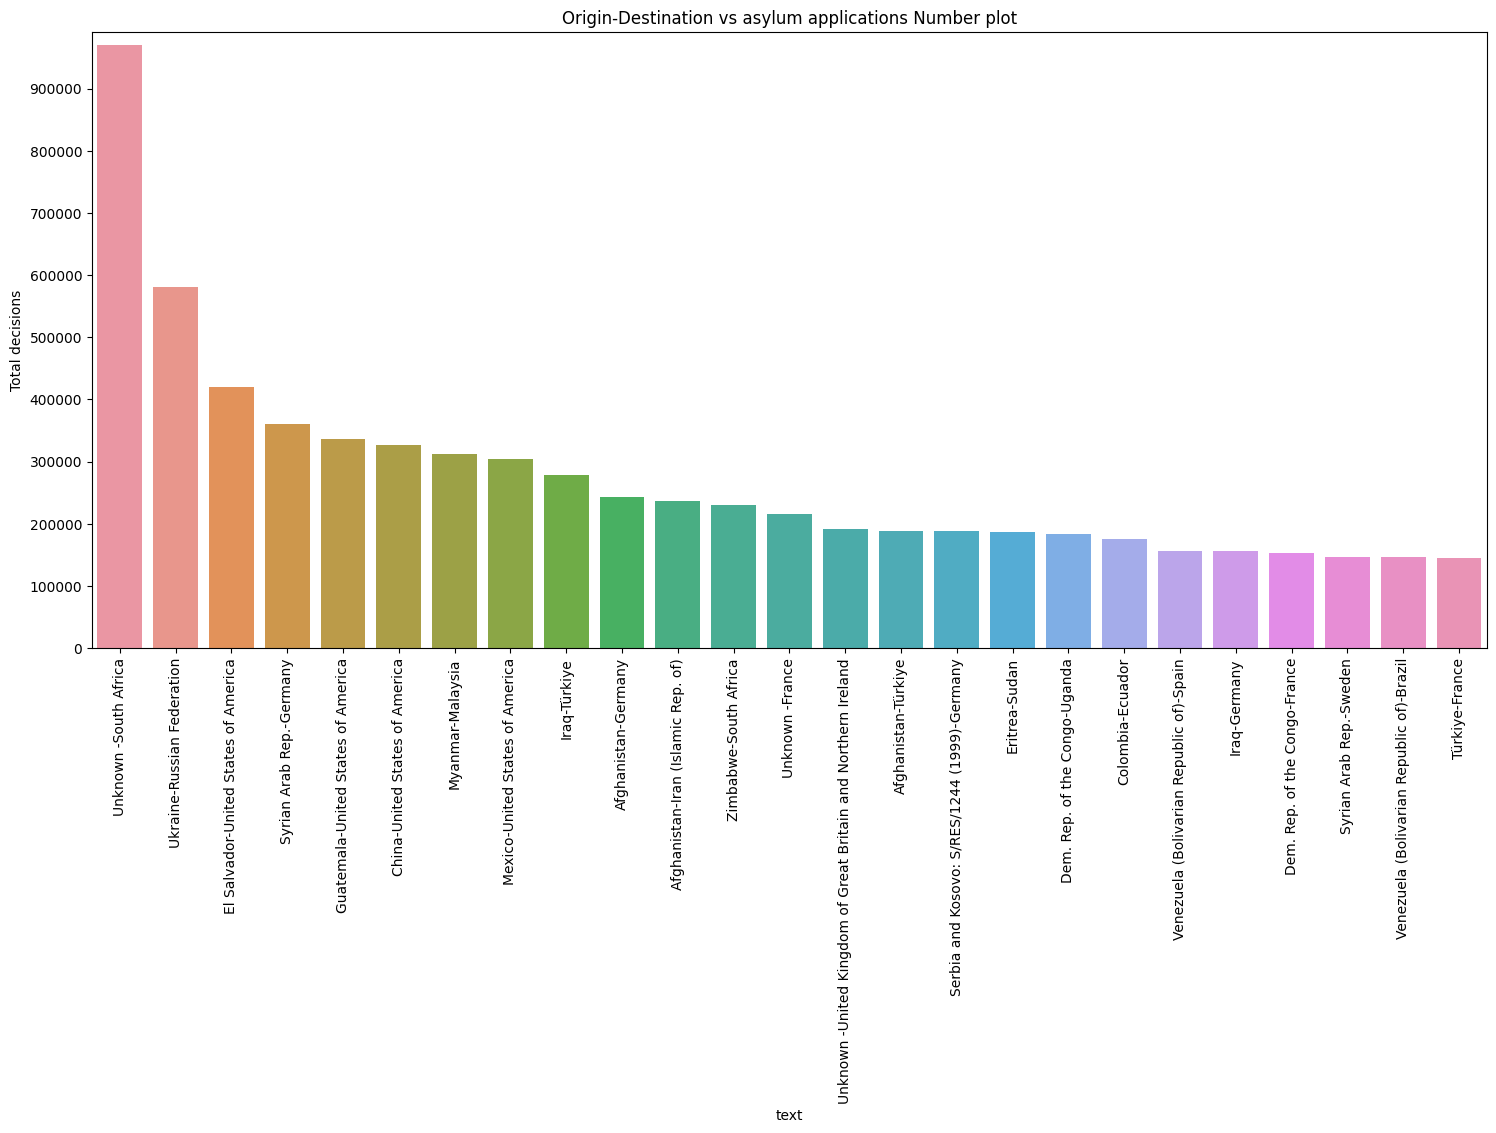

In [152]:
# este gráfico muestra el número de solicitudes de asilo por país de origen y destino totales 
from_to_values["text"] = from_to_values.apply(lambda row:row["Country of origin"]+"-"+row["Country of asylum"],axis=1)
from_to_values = from_to_values.sort_values(["Total decisions"],ascending=False).head(25)

plt.figure(figsize=(18,8));
ax = sns.barplot(x=from_to_values.text,y=from_to_values["Total decisions"]);
plt.title("Origin-Destination vs asylum applications Number plot");
plt.xticks(rotation='vertical');
plt.ylim(0, (from_to_values["Total decisions"]).max()+20000);
plt.yticks(np.arange(0, (from_to_values["Total decisions"]).max()+20000, 100000));
plt.show();

In [148]:
from_to_values

,Country of origin,Country of asylum,Total decisions,text
7368,Unknown,South Africa,970957,Unknown -South Africa
7163,Ukraine,Russian Federation,580275,Ukraine-Russian Federation
2237,El Salvador,United States of America,420441,El Salvador-United States of America
6559,Syrian Arab Rep.,Germany,360477,Syrian Arab Rep.-Germany
2859,Guatemala,United States of America,336693,Guatemala-United States of America
1410,China,United States of America,327123,China-United States of America
4547,Myanmar,Malaysia,312827,Myanmar-Malaysia
4357,Mexico,United States of America,303736,Mexico-United States of America
3437,Iraq,Türkiye,278682,Iraq-Türkiye
38,Afghanistan,Germany,243757,Afghanistan-Germany


In [138]:
from_to_values[from_to_values['Country of origin']=='Syrian Arab Rep.']

,Country of origin,Country of asylum,Total decisions
6559,Syrian Arab Rep.,Germany,360477
6628,Syrian Arab Rep.,Sweden,145926
6518,Syrian Arab Rep.,Austria,91289
6564,Syrian Arab Rep.,Hungary,73058
6561,Syrian Arab Rep.,Greece,72871
...,...,...,...
6535,Syrian Arab Rep.,"China, Hong Kong SAR",5
6591,Syrian Arab Rep.,Mongolia,5
6589,Syrian Arab Rep.,Mauritius,5
6563,Syrian Arab Rep.,Honduras,5


## preguntas:
### - De los 5 países con más forzados a desplazarse, hacia dónde han ido?
### - De los 5 países con más refugiados, de donde vienen?
### - Cuáles han sido los mayores eventos de salida de un país?
### - Mayor recibiemiento de personas en 1 año

In [153]:
asylum.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Authority,Stage of procedure,Cases / Persons,Recognized decisions,Complementary protection,Rejected decisions,Otherwise closed,Total decisions
0,2014,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,248201,0,16687,264888
1,2015,Ukraine,UKR,Russian Federation,RUS,G,TA,P,0,148379,0,21,148400
4,2022,Syrian Arab Rep.,SYR,Germany,DEU,G,FI,P,15078,51754,34,6466,73332
5,2016,Syrian Arab Rep.,SYR,Sweden,SWE,G,FI,P,2504,40971,136,4035,47646
6,2020,Venezuela (Bolivarian Republic of),VEN,Spain,ESP,G,FI,P,5,40396,882,0,41283


In [158]:
# Veamos cuáles son lo países de donde han tenido que emigrar forzosamente más personas 
asylum.groupby('Country of origin')['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False).head(10)  

,Country of origin,Total decisions
197,Unknown,2018352
0,Afghanistan,1925760
87,Iraq,1321400
178,Syrian Arab Rep.,1273301
50,Dem. Rep. of the Congo,983247
192,Ukraine,816754
168,Somalia,802920
161,Serbia and Kosovo: S/RES/1244 (1999),763602
137,Pakistan,718683
36,China,686897


In [156]:
asylum.groupby(['Year', 'Country of origin'])['Total decisions'].sum().reset_index().sort_values('Total decisions', ascending=False).head(10)  

,Year,Country of origin,Total decisions
3004,2016,Unknown,863919
2637,2014,Ukraine,275215
0,2000,Afghanistan,270686
3922,2022,Afghanistan,202875
2987,2016,Syrian Arab Rep.,169083
2815,2015,Ukraine,165753
2803,2015,Syrian Arab Rep.,161690
3198,2018,Afghanistan,149653
3013,2017,Afghanistan,149006
4081,2022,Syrian Arab Rep.,147710
